In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [2]:
#Reading and analysing data
data = pd.read_csv('../Datasets/creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
std_scalar = StandardScaler()

data['Amount'] = std_scalar.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = std_scalar.fit_transform(data['Time'].values.reshape(-1,1))
print(data)

            Time         V1         V2        V3        V4        V5  \
0      -1.996583  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1      -1.996583   1.191857   0.266151  0.166480  0.448154  0.060018   
2      -1.996562  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3      -1.996562  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4      -1.996541  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  1.641931 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  1.641952  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  1.641974   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  1.641974  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  1.642058  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [5]:
print(data['Class'].value_counts())
print('Not Frauds: ',round(data['Class'].value_counts()[0]/len(data) * 100,2),'%')
print('Frauds: ',round(data['Class'].value_counts()[1]/len(data) * 100,2),'%')

0    284315
1       492
Name: Class, dtype: int64
Not Frauds:  99.83 %
Frauds:  0.17 %


In [6]:
fraud_df = data.loc[data['Class']==1] #All samples which are fraud
non_fraud_df = data.loc[data['Class']==0][:492] #First 492 samples of not fraud

fin_data = pd.concat([fraud_df,non_fraud_df])
fin_data = fin_data.sample(frac=1,random_state=40)

print(fin_data['Class'].value_counts()/len(fin_data))

1    0.5
0    0.5
Name: Class, dtype: float64


In [7]:
X = fin_data.drop('Class',axis = 1)
y = fin_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 23)

print(X_train.shape)
print(X_test.shape)

(738, 30)
(246, 30)


In [8]:
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Number of ',train_unique_label,'(Train) =',train_counts_label)
print('Number of ',test_unique_label,'(Test) =',test_counts_label)

Number of  [0 1] (Train) = [366 372]
Number of  [0 1] (Test) = [126 120]


## Logistic Regression

In [9]:
clf = LogisticRegression().fit(X_train,y_train)


In [10]:
#Taking a dummy set
print('Testing on X_test -\n',X_test.values[3,:])
prob = clf.predict_proba(X_test.values[3,:].reshape(1,-1))
print('Probabilities =',prob)
print('Predicted result:',prob.argmax())
print('Original Class:',y_test.values[3])

print('\nOR\n')

prob = clf.predict(X_test.values[3,:].reshape(1,-1))
print('Predicted result:',prob)
print('Original Class:',y_test.values[3])


Testing on X_test -
 [  0.11390527 -19.64185673  14.70633467 -22.80123769  12.11467184
 -14.89811253   0.8407777  -28.01129291 -11.91963882  -8.9609217
 -18.91324333   4.97124871 -12.68630752  -1.07144311  -7.38337004
  -2.9924303   -8.58230865 -13.80656813  -6.0003588    1.42263161
   3.83464905  -8.2288741    3.31817777   2.58521235   0.19500857
  -1.19480304   0.03842294  -4.12674625  -0.64532922  -0.34411376]
Probabilities = [[0. 1.]]
Predicted result: 1
Original Class: 1

OR

Predicted result: [1]
Original Class: 1


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
score = clf.score(X_test,y_test)
print('Precision on entire dataset =',score)

Precision on entire dataset = 0.983739837398374


In [12]:
y_pred = clf.predict(X_test.values)

conf_mat = confusion_matrix(y_pred,y_test)
print(conf_mat)

[[125   3]
 [  1 117]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


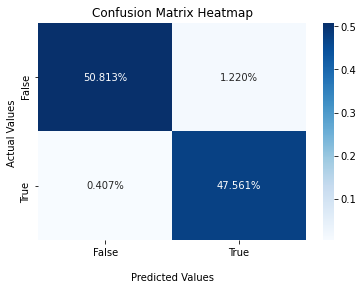

In [13]:
ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.3%', cmap='Blues')

ax.set_title('Confusion Matrix Heatmap');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [14]:
X1 = data[150000:].drop('Class',axis = 1)
y1 = data[150000:]['Class']

In [17]:
y_pred1 = clf.predict(X1.values)

conf_mat = confusion_matrix(y1,y_pred1)
print(conf_mat)

[[    19 134589]
 [     0    199]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
